In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib import gridspec
import heapq
import itertools

In [546]:
losses_woe, entropies_woe = [], []

n_s_woe = 8
n_f_woe = 10

for i in range(n_s_woe,n_f_woe):
    losses_woe.append(np.loadtxt('concept_training_losses_woe_'+str(i)+'.txt'))
    entropies_woe.append(np.loadtxt('concept_training_entropies_woe_'+str(i)+'.txt'))

In [289]:
losses_we, entropies_we = [], []

n_ent = 8

for i in range(5,n_ent):
    losses_we.append(np.loadtxt('concept_training_losses_we_'+str(i)+'.txt'))
    entropies_we.append(np.loadtxt('concept_training_entropies_we_'+str(i)+'.txt'))

In [276]:
n_ent = 8
for i in range(n_ent-1,n_ent):
    losses_we.append(np.loadtxt('concept_training_losses_we_'+str(i)+'.txt'))
    entropies_we.append(np.loadtxt('concept_training_entropies_we_'+str(i)+'.txt'))

In [294]:
losses_we[0].shape

(2000000,)

In [571]:
losses_we[n_ent-1-5] = np.loadtxt('concept_training_losses_we_'+str(n_ent-1)+'.txt')
entropies_we[n_ent-1-5] = np.loadtxt('concept_training_entropies_we_'+str(n_ent-1)+'.txt')

In [569]:
mean_losses_we, mean_entropies_we, t_we = [], [], []
max_losses_we, max_entropies_we = [], []
std_losses_we, std_entropies_we = [], []
min_losses_we, min_entropies_we = [], []
for i in range(5,n_ent):
    mean_losses_we.append(losses_we[i-5].reshape(-1,n_iters).mean(1))
    mean_entropies_we.append(entropies_we[i-5].reshape(entropies_we[i-5].shape[0]//n_iters,n_iters,-1).mean(1))
    max_losses_we.append(losses_we[i-5].reshape(-1,n_iters).max(1))
    std_losses_we.append(losses_we[i-5].reshape(-1,n_iters).std(1))
    max_entropies_we.append(entropies_we[i-5].reshape(entropies_we[i-5].shape[0]//n_iters,n_iters,-1).max(1))
    std_entropies_we.append(entropies_we[i-5].reshape(entropies_we[i-5].shape[0]//n_iters,n_iters,-1).std(1))
    min_losses_we.append(losses_we[i-5].reshape(-1,n_iters).min(1))
    min_entropies_we.append(entropies_we[i-5].reshape(entropies_we[i-5].shape[0]//n_iters,n_iters,-1).min(1))
    t_we.append(np.arange(0,losses_we[i-5].shape[0]//n_iters)*n_iters)
    
mean_losses_woe, mean_entropies_woe, t_woe = [], [], []
max_losses_woe, max_entropies_woe = [], []
std_losses_woe, std_entropies_woe = [], []
min_losses_woe, min_entropies_woe = [], []
for i in range(n_s_woe, n_f_woe):
    mean_losses_woe.append(losses_woe[i-n_s_woe].reshape(losses_woe[i-n_s_woe].shape[0]//n_iters,n_iters,-1).mean(1))
    max_losses_woe.append(losses_woe[i-n_s_woe].reshape(losses_woe[i-n_s_woe].shape[0]//n_iters,n_iters,-1).max(1))
    min_losses_woe.append(losses_woe[i-n_s_woe].reshape(losses_woe[i-n_s_woe].shape[0]//n_iters,n_iters,-1).min(1))
    std_losses_woe.append(losses_woe[i-n_s_woe].reshape(losses_woe[i-n_s_woe].shape[0]//n_iters,n_iters,-1).std(1))
    mean_entropies_woe.append(entropies_woe[i-n_s_woe].reshape(entropies_woe[i-n_s_woe].shape[0]//n_iters,n_iters,-1).mean(1))
    max_entropies_woe.append(entropies_woe[i-n_s_woe].reshape(entropies_woe[i-n_s_woe].shape[0]//n_iters,n_iters,-1).max(1))
    std_entropies_woe.append(entropies_woe[i-n_s_woe].reshape(entropies_woe[i-n_s_woe].shape[0]//n_iters,n_iters,-1).std(1))
    min_entropies_woe.append(entropies_woe[i-n_s_woe].reshape(entropies_woe[i-n_s_woe].shape[0]//n_iters,n_iters,-1).min(1))
    t_woe.append(np.arange(0,losses_woe[i-n_s_woe].shape[0]//n_iters)*n_iters)

In [572]:
#np.savetxt('concept_training_losses_woe_24.txt', losses)
#np.savetxt('concept_training_entropies_woe_24.txt', entropies)

In [ ]:
# entropies_2 = np.loadtxt('concept_training_entropies_2_woe.txt')
#mean_entropies_2 = entropies_2.reshape(entropies_2.shape[0]//n_iters,n_iters,-1).mean(1)
#max_entropies_2 = entropies_2.reshape(entropies_2.shape[0]//n_iters,n_iters,-1).max(1)
#std_entropies_2 = entropies_2.reshape(entropies_2.shape[0]//n_iters,n_iters,-1).std(1)
#min_entropies_2 = entropies_2.reshape(entropies_2.shape[0]//n_iters,n_iters,-1).min(1)
#t_2 = np.arange(0,entropies_2.shape[0]//n_iters)*n_iters

In [1313]:
losses = np.loadtxt('concept_training_losses_woe.txt')
entropies = np.loadtxt('concept_training_entropies_woe.txt')

In [1314]:
mutual_infs = []
mutual_infs.append((entropies[:,6] - entropies[:,1]).reshape(-1,1))
mutual_infs.append((entropies[:,6] - losses[:,1]).reshape(-1,1))
mutual_infs.append((entropies[:,6] - entropies[:,0]).reshape(-1,1))
mutual_infs.append((entropies[:,6] - entropies[:,5]).reshape(-1,1))
mutual_infs = np.concatenate(mutual_infs, 1)

In [1315]:
n_iters = 1000
c = 5000 // n_iters

mean_losses = losses.reshape(losses.shape[0]//n_iters,n_iters,-1).mean(1)
max_losses = losses.reshape(losses.shape[0]//n_iters,n_iters,-1).max(1)
std_losses = losses.reshape(losses.shape[0]//n_iters,n_iters,-1).std(1)
min_losses = losses.reshape(losses.shape[0]//n_iters,n_iters,-1).min(1)

mean_entropies = entropies.reshape(entropies.shape[0]//n_iters,n_iters,-1).mean(1)
max_entropies = entropies.reshape(entropies.shape[0]//n_iters,n_iters,-1).max(1)
std_entropies = entropies.reshape(entropies.shape[0]//n_iters,n_iters,-1).std(1)
min_entropies = entropies.reshape(entropies.shape[0]//n_iters,n_iters,-1).min(1)

mean_mi = mutual_infs.reshape(mutual_infs.shape[0]//n_iters,n_iters,-1).mean(1)
max_mi = mutual_infs.reshape(mutual_infs.shape[0]//n_iters,n_iters,-1).max(1)
std_mi = mutual_infs.reshape(mutual_infs.shape[0]//n_iters,n_iters,-1).std(1)
min_mi = mutual_infs.reshape(mutual_infs.shape[0]//n_iters,n_iters,-1).min(1)

t_l = np.arange(0,losses.shape[0]//n_iters)*n_iters
t = np.arange(0,entropies.shape[0]//n_iters)*n_iters

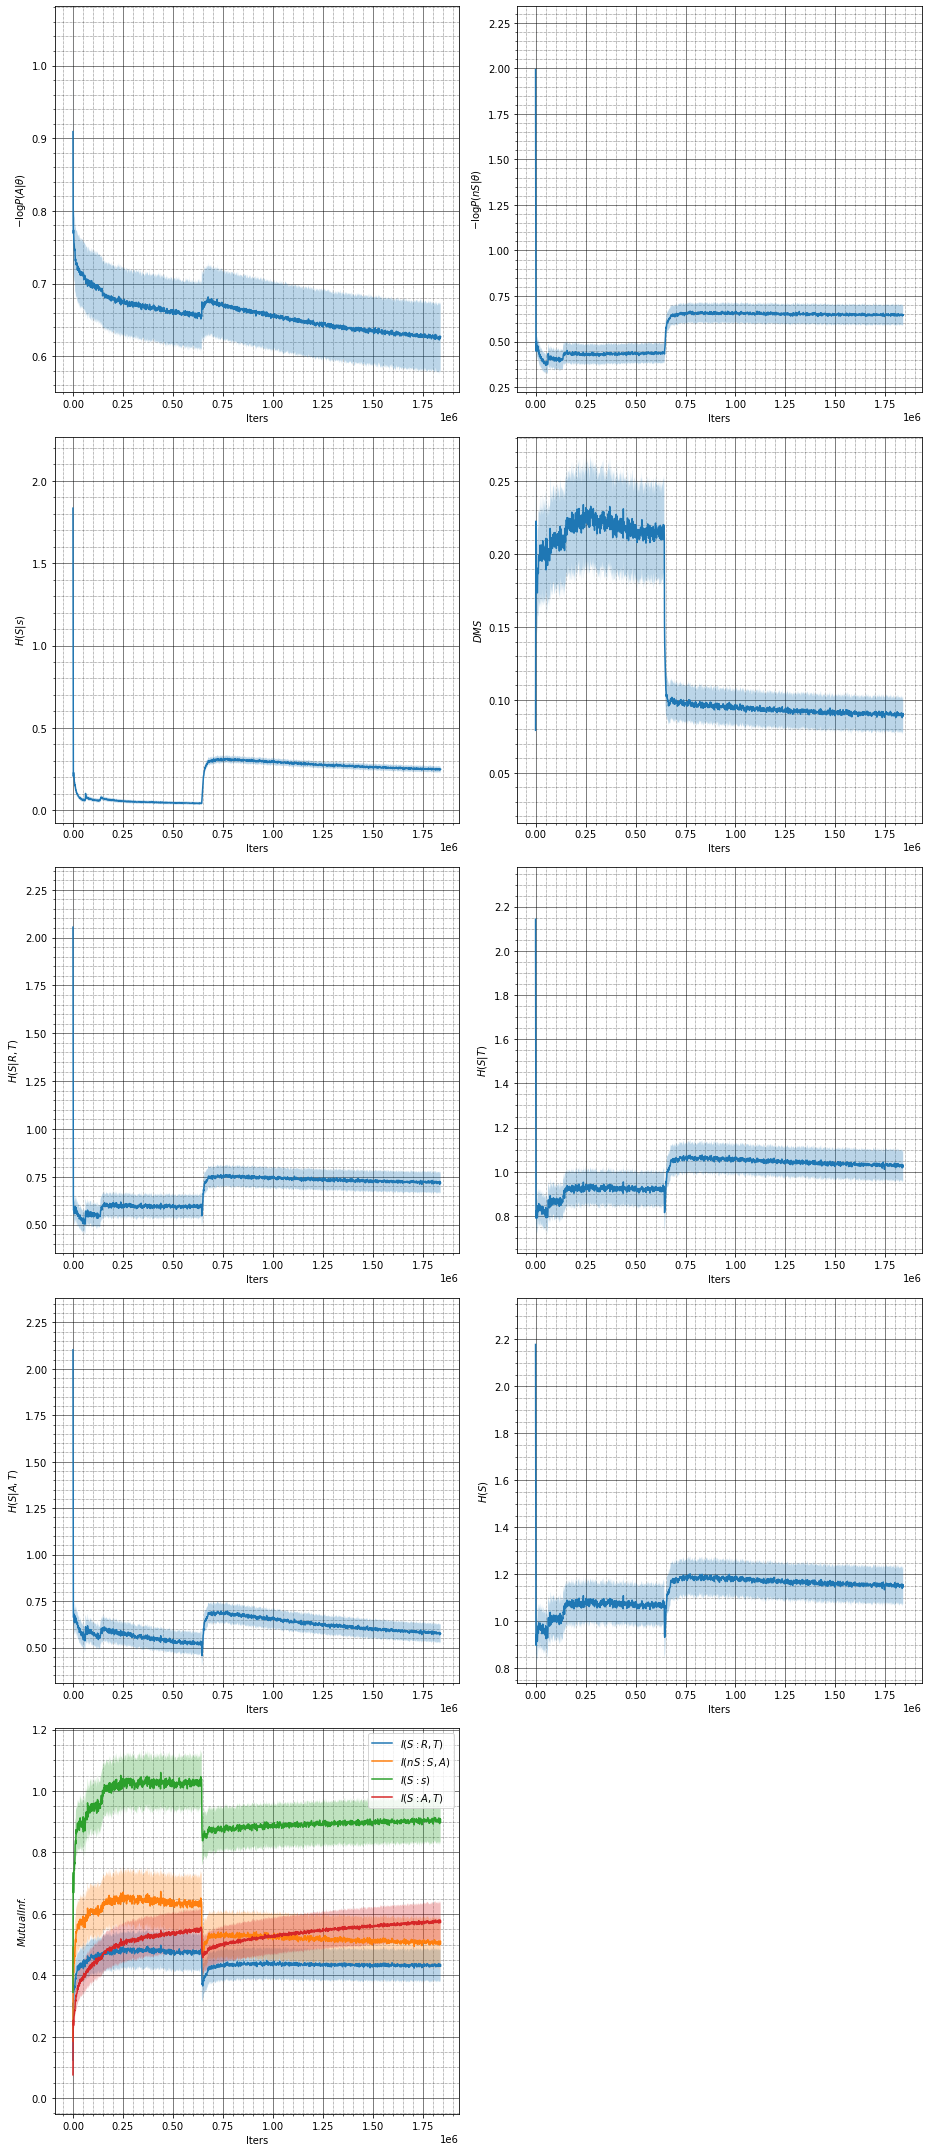

In [1316]:
map_ = [[0,1],[0,4],[1,2],[5,6]]
labels_ = [[r'$-\log P(A|\theta)$', r'$-\log P(nS|\theta)$'], [r'$H(S|s)$', r'$DMS$'], 
          [r'$H(S|R,T)$', r'$H(S|T)$'], [r'$H(S|A,T)$', r'$H(S)$'], [r'$Mutual Inf.$', r'WC']]
fig, ax = plt.subplots(5,2,figsize=(13,6*5))
for i,j in itertools.product(range(0,5), range(0,2)):
    if i != 4 or j != 1:
        ax[i,j].set_axisbelow(True)
        ax[i,j].minorticks_on()
        ax[i,j].set_xlabel('Iters')
        ax[i,j].set_ylabel(labels_[i][j])
        ax[i,j].grid(which='major', linestyle='-', linewidth='0.5', color='black')
        ax[i,j].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i,j].ticklabel_format(style='sci', axis='x', scilimits=(0,1))
        # ax[i,j].set_yscale("log")
    if i != 0 and i!=4:
        n = map_[i][j]
        ax[i,j].plot(t, mean_entropies[:,n])
        ax[i,j].fill_between(t, mean_entropies[:,n]-std_entropies[:,n], mean_entropies[:,n]+std_entropies[:,n], alpha=0.3)
    elif i==0:
        ax[i,j].plot(t_l, mean_losses[:,j])
        ax[i,j].fill_between(t_l, mean_losses[:,j]-std_losses[:,j], mean_losses[:,j]+std_losses[:,j], alpha=0.3)
    elif i==4 and j==0:
        for k in range(0,4):
            ax[i,j].plot(t, mean_mi[:,k])
            ax[i,j].fill_between(t, mean_mi[:,k]-std_mi[:,k], mean_mi[:,k]+std_mi[:,k], alpha=0.3)
            ax[i,j].legend([r'$I(S:R,T)$', r'$I(nS:S,A)$', r'$I(S:s)$', r'$I(S:A,T)$'])

    
ax[4,1].set_axis_off()

plt.tight_layout()
plt.savefig('losses_and_entropies_woe.png', dpi=300)
plt.show()
plt.close()

NameError: name 'n_f_woe' is not defined

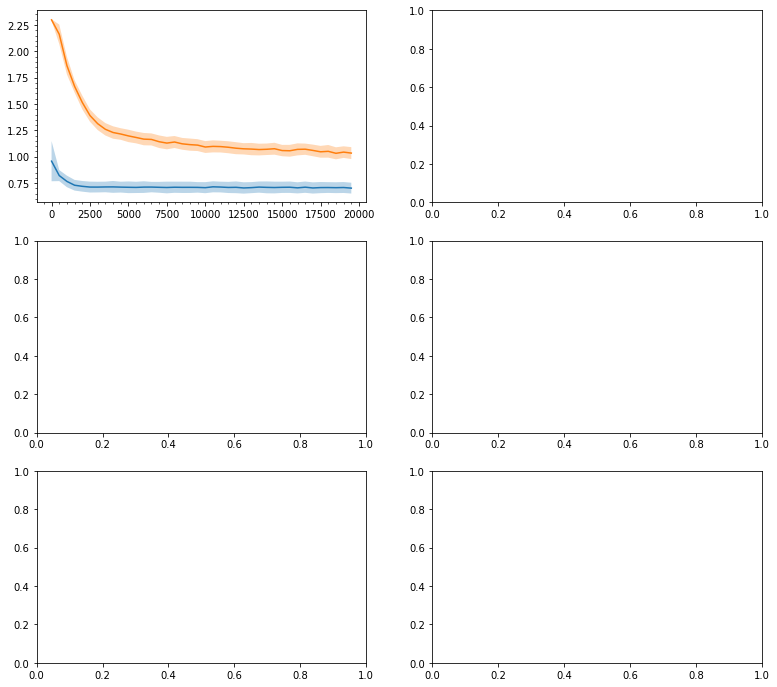

In [914]:
fig, ax = plt.subplots(3,2,figsize=(13,12))
ax[0,0].set_axisbelow(True)
ax[0,0].minorticks_on()
# plt.subplot(3,2,1)
ax[0,0].plot(t, mean_losses[:,0])
# ax[0,0].fill_between(t, min_losses, max_losses, alpha=0.1)
ax[0,0].fill_between(t, mean_losses[:,0]-std_losses[:,0], mean_losses[:,0]+std_losses[:,0], alpha=0.3)
ax[0,0].plot(t, mean_losses[:,1])
ax[0,0].fill_between(t, mean_losses[:,1]-std_losses[:,1], mean_losses[:,1]+std_losses[:,1], alpha=0.3)
for i in range(0,n_f_woe-n_s_woe):
    ax[0,0].plot(t_woe[i], mean_losses_woe[i][:,0])
    ax[0,0].fill_between(t_woe[i], mean_losses_woe[i][:,0]-std_losses_woe[i][:,0], mean_losses_woe[i][:,0]+std_losses_woe[i][:,0], alpha=0.3)
    ax[0,0].plot(t_woe[i], mean_losses_woe[i][:,1])
    ax[0,0].fill_between(t_woe[i], mean_losses_woe[i][:,1]-std_losses_woe[i][:,1], mean_losses_woe[i][:,1]+std_losses_woe[i][:,1], alpha=0.3)
# for i in range(5,n_ent):
#     ax[0,0].plot(t_we[i-5], mean_losses_we[i-5])
    # ax[0,0].fill_between(t_we[i-5], min_losses_we[i-5], max_losses_we[i-5], alpha=0.3)
#     ax[0,0].fill_between(t_we[i-5], mean_losses_we[i-5]-std_losses_we[i-5], mean_losses_we[i-5]+std_losses_we[i-5], alpha=0.3)
ax[0,0].set_ylabel(r'$-\log P(A|\theta)$')
ax[0,0].set_xlabel('Iters')
ax[0,0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax[0,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[0,0].ticklabel_format(style='sci', axis='x', scilimits=(0,1))
# ax[0,0].set_yscale("log")
# plt.subplot(3,2,2)
ax[0,1].set_axisbelow(True)
ax[0,1].minorticks_on()
ax[0,1].plot(t, mean_entropies[:,0])
ax[0,1].fill_between(t, min_entropies[:,0], max_entropies[:,0], alpha=0.3)
for i in range(5,n_ent):
    ax[0,1].plot(t_we[i-5], mean_entropies_we[i-5][:,0])
    ax[0,1].fill_between(t_we[i-5], min_entropies_we[i-5][:,0], max_entropies_we[i-5][:,0], alpha=0.3)
ax[0,1].set_ylabel(r'$H(S|s)$')
ax[0,1].set_xlabel('Iters')
ax[0,1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax[0,1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[0,1].ticklabel_format(style='sci', axis='x', scilimits=(0,1))
# plt.subplot(3,2,3)
ax[1,0].set_axisbelow(True)
ax[1,0].minorticks_on()
ax[1,0].plot(t, mean_entropies[:,1])
ax[1,0].fill_between(t, min_entropies[:,1], max_entropies[:,1], alpha=0.3)
for i in range(5,n_ent):
    ax[1,0].plot(t_we[i-5], mean_entropies_we[i-5][:,1])
    ax[1,0].fill_between(t_we[i-5], min_entropies_we[i-5][:,1], max_entropies_we[i-5][:,1], alpha=0.3)
ax[1,0].set_ylabel(r'$H(S|R;T)$')
ax[1,0].set_xlabel('Iters')
ax[1,0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax[1,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[1,0].ticklabel_format(style='sci', axis='x', scilimits=(0,1))
# plt.subplot(3,2,4)
ax[1,1].set_axisbelow(True)
ax[1,1].minorticks_on()
ax[1,1].plot(t, mean_entropies[:,2])
ax[1,1].fill_between(t, min_entropies[:,2], max_entropies[:,2], alpha=0.3)
for i in range(5,n_ent):
    ax[1,1].plot(t_we[i-5], mean_entropies_we[i-5][:,2])
    ax[1,1].fill_between(t_we[i-5], min_entropies_we[i-5][:,2], max_entropies_we[i-5][:,2], alpha=0.3)
ax[1,1].set_ylabel(r'$H(S\'|S,A,T)$')
ax[1,1].set_xlabel('Iters')
ax[1,1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax[1,1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[1,1].ticklabel_format(style='sci', axis='x', scilimits=(0,1))
# plt.subplot(3,2,5)
ax[2,0].set_axisbelow(True)
ax[2,0].minorticks_on()
ax[2,0].plot(t, mean_entropies[:,3])
ax[2,0].fill_between(t, min_entropies[:,3], max_entropies[:,3], alpha=0.3)
for i in range(5,n_ent):
    ax[2,0].plot(t_we[i-5], mean_entropies_we[i-5][:,3])
    ax[2,0].fill_between(t_we[i-5], min_entropies_we[i-5][:,3], max_entropies_we[i-5][:,3], alpha=0.3)
ax[2,0].set_ylabel(r'$H(S|T)-H(A|T)$')
ax[2,0].set_xlabel('Iters')
ax[2,0].grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax[2,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[2,0].ticklabel_format(style='sci', axis='x', scilimits=(0,1))
# plt.subplot(3,2,6)
ax[2,1].set_axisbelow(True)
ax[2,1].minorticks_on()
ax[2,1].plot(t, mean_entropies[:,4])
ax[2,1].fill_between(t, min_entropies[:,4], max_entropies[:,4], alpha=0.3)
for i in range(7,n_ent):
    ax[2,1].plot(t_we[i-5], mean_entropies_we[i-5][:,4])
    ax[2,1].fill_between(t_we[i-5], min_entropies_we[i-5][:,4], max_entropies_we[i-5][:,4], alpha=0.3)
ax[2,1].set_ylabel(r'$DMS$')
ax[2,1].set_xlabel('Iters')
ax[2,1].grid(which='major', linestyle='-', linewidth='0.5', color='black')
ax[2,1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax[2,1].ticklabel_format(style='sci', axis='x', scilimits=(0,1))
plt.tight_layout()
plt.savefig('losses_and_entropies.png', dpi=300)
plt.show()
plt.close()

In [517]:
classified_data_woe = np.loadtxt('classified_samples_woe.txt')

In [2]:
classified_data = np.loadtxt('classified_samples_x.txt')

In [3]:
x, y, theta, S, _ = classified_data[:,0], classified_data[:,1], classified_data[:,2], classified_data[:,3], classified_data[:,4]

In [4]:
N = x.shape[0]

In [5]:
G = 4
angles = np.linspace(-np.pi, np.pi, 8*G+1)
deltas = theta.reshape(-1,1) - angles.reshape(1,-1)
g_id = (np.abs(deltas) <= np.pi/(8*G)).argmax(1).reshape(-1,1)
g_id = np.array([g_id[i] if g_id[i] != 8*G else 0 for i in range(0, N)])

deltas_ = deltas[:,:8*G]
delta_id_ = (8*G*np.argmin([np.abs(deltas[:,0]),np.abs(deltas[:,8*G])],0)).astype(int)
deltas_[:,0] = deltas[np.arange(N),delta_id_]
g_id_ = (g_id%(8*G)).astype('int')

In [7]:
sum_/len(g_id_)*100

0.0

In [8]:
x_g, y_g, theta_g, S_g, deltas_g = [], [], [], [], []

In [9]:
for k in range(0,8*G):
    x_g.append( np.array([x[i] for i in range(0, N) if g_id[i]==k]) )
    y_g.append( np.array([y[i] for i in range(0, N) if g_id[i]==k]) )
    theta_g.append( np.array([theta[i] for i in range(0, N) if g_id[i]==k]) )
    S_g.append( np.array([S[i] for i in range(0, N) if g_id[i]==k]) )
    deltas_g.append( np.array([deltas_[i,k] for i in range(0, N) if g_id_[i]==k]) )

In [10]:
sum_ = 0
for i in range(0,8):
    sum_ += len(S_g[i*G])

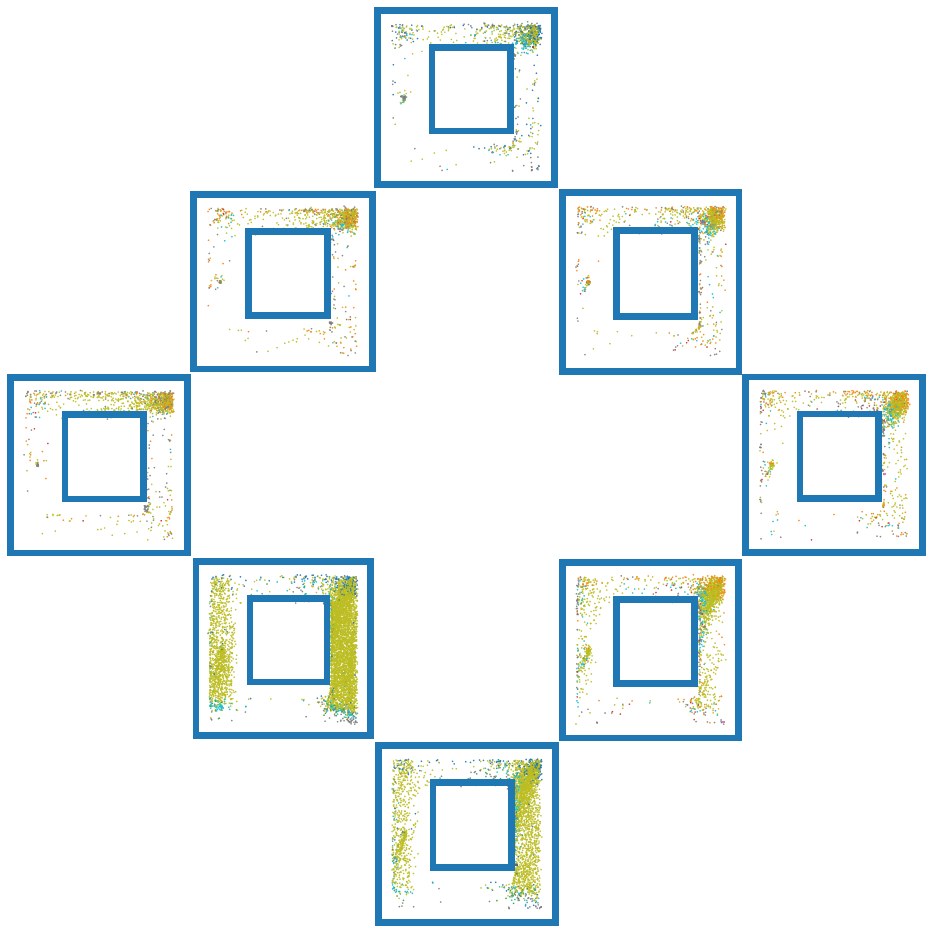

In [11]:
fig, ax = plt.subplots(5,5,figsize=(13,13))

left_outer, width_outer = -3.5, 25.0
bottom_outer, height_outer = -12.5, 25.
right_outer = left_outer + width_outer
top_outer = bottom_outer + height_outer

left_inner, width_inner = 3.5, 12.5
bottom_inner, height_inner = -5.5, 12.5
right_inner = left_inner + width_inner
top_inner = bottom_inner + height_inner

outer_squares = [[] for i in range(0,4)]
inner_squares = [[] for i in range(0,4)]

ax_id = [[2,0],[1,1],[0,2],[1,3],[2,4],[3,3],[4,2],[3,1]]

for i in range(0,8):
    outer_squares[0].append(patches.Rectangle((left_outer-1, bottom_outer-1), 1, height_outer+2, fill=True, clip_on=False))
    outer_squares[1].append(patches.Rectangle((left_outer+width_outer, bottom_outer-1), 1, height_outer+2, fill=True, clip_on=False))
    outer_squares[2].append(patches.Rectangle((left_outer-1, bottom_outer-1), height_outer+2, 1, fill=True, clip_on=False))
    outer_squares[3].append(patches.Rectangle((left_outer-1, bottom_outer+width_outer), height_outer+2, 1, fill=True, clip_on=False))
    inner_squares[0].append(patches.Rectangle((left_inner, bottom_inner), 1, height_inner, fill=True, clip_on=False))
    inner_squares[1].append(patches.Rectangle((left_inner+width_inner-1, bottom_inner), 1, height_inner, fill=True, clip_on=False))
    inner_squares[2].append(patches.Rectangle((left_inner, bottom_inner), height_inner, 1, fill=True, clip_on=False))
    inner_squares[3].append(patches.Rectangle((left_inner, bottom_inner+width_inner), height_inner, 1, fill=True, clip_on=False))

    xi, yi = ax_id[i]
    ax[xi,yi].scatter(x_g[i], y_g[i], s=(np.pi/8-np.abs(deltas_g[i]))/1, c=S_g[i], cmap='tab10')
    for k in range(0,4):
        ax[xi,yi].add_patch(outer_squares[k][-1])
        ax[xi,yi].add_patch(inner_squares[k][-1])
for i in range(0,5):
    for j in range(0,5):
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()
plt.close()

In [18]:
cmap_r = colors.ListedColormap(['C2','C9','C3','C5','C6','C8','C7','C4','C0','C1'])

0.00022265498186457844
0.00027967653968141715
6.532188116525894e-06
1.7177973559934223e-05
1.72518846305314e-05
6.592084917300678e-05
3.113950376654184e-05
5.21861769031684e-06


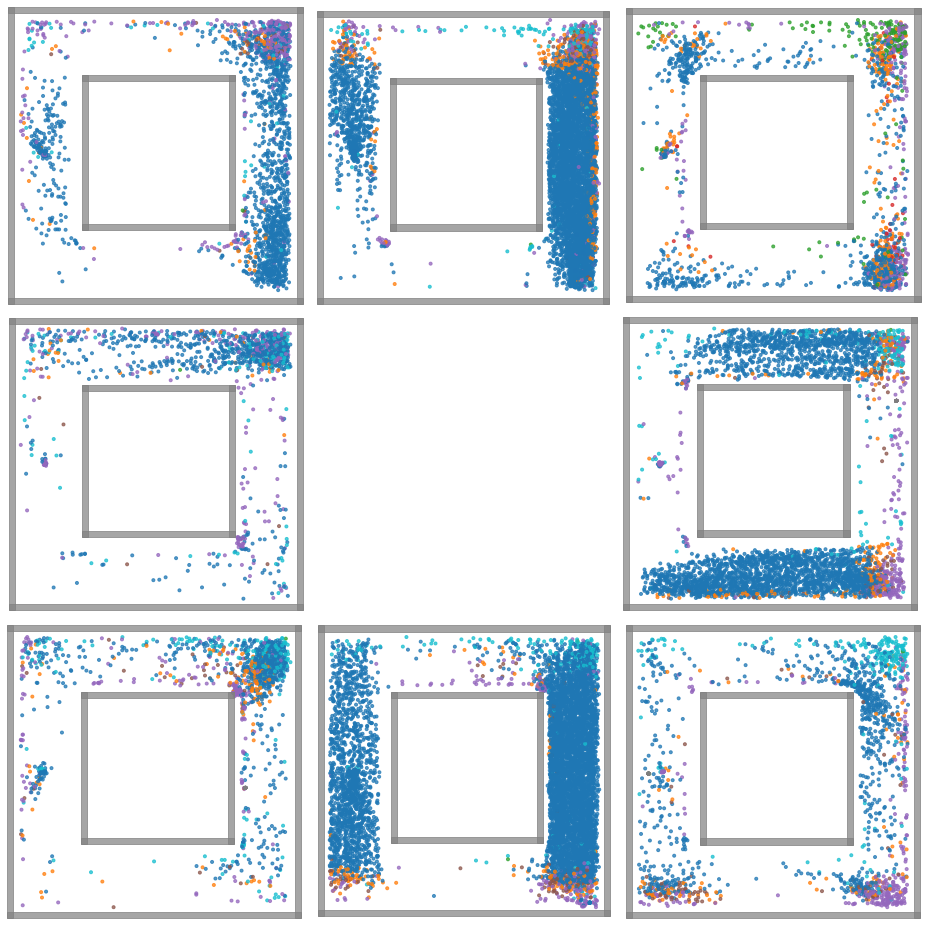

In [19]:
fig = plt.figure(figsize=(13,13))

scale = 1
axes = []
if scale == 1:
    gs = gridspec.GridSpec(3,3)
    ax_id_refined = [[1,0],[2,0],[2,1],[2,2],[1,2],[0,2],[0,1],[0,0]]
elif scale == 2:
    gs = gridspec.GridSpec(5*scale, 5*scale)
    ax_id_refined = [[4,0],[7,1],[8,4],[7,7],[4,8],[1,7],[0,4],[1,1]]
elif scale == 3:
    gs = gridspec.GridSpec((5-1)*scale+1, (5-1)*scale+1)
    ax_id_refined = [[5,0],[9,1],[10,5],[9,9],[5,10],[1,9],[0,5],[1,1]]

kwargs_patches = {
    'fill': True,
    'clip_on': False,
    'alpha': 0.7,
    'color': 'grey'
}
delta=0.5

for i in range(0,8):
    xi, yi = ax_id_refined[i]
    axes.append(plt.subplot(gs[xi:xi+scale, yi:yi+scale]))

    outer_squares[0].append(patches.Rectangle((left_outer+0.5, bottom_outer+0.5), 1-delta, height_outer-1, **kwargs_patches))
    outer_squares[1].append(patches.Rectangle((left_outer+width_outer-1+delta-0.5, bottom_outer+0.5), 1-delta, height_outer-1, **kwargs_patches))
    outer_squares[2].append(patches.Rectangle((left_outer+0.5, bottom_outer+0.5), height_outer-1, 1-delta, **kwargs_patches))
    outer_squares[3].append(patches.Rectangle((left_outer+0.5, bottom_outer+width_outer-1+delta-0.5), height_outer-1, 1-delta, **kwargs_patches))
    
    inner_squares[0].append(patches.Rectangle((left_inner-0.5, bottom_inner-0.5), 1-delta, height_inner, **kwargs_patches))
    inner_squares[1].append(patches.Rectangle((left_inner+width_inner-1.5+delta, bottom_inner-0.5), 1-delta, height_inner, **kwargs_patches))
    inner_squares[2].append(patches.Rectangle((left_inner-0.5, bottom_inner-0.5), height_inner, 1-delta, **kwargs_patches))
    inner_squares[3].append(patches.Rectangle((left_inner-0.5, bottom_inner+width_inner-1.5+delta), height_inner, 1-delta, **kwargs_patches))

    print((np.pi/(8*G)-np.abs(deltas_g[i])).min())
    axes[-1].scatter(x_g[i*G], y_g[i*G], c=S_g[i*G], cmap=cmap_r, alpha=0.75, marker='.') # s=0.5*(np.pi/(8)-np.abs(deltas_g[i*G]))**0.5+1, cmap=cmap, 
    for k in range(0,4):
        axes[-1].add_patch(outer_squares[k][-1])
        axes[-1].add_patch(inner_squares[k][-1])

    axes[-1].set_axis_off()

plt.tight_layout()
plt.savefig('square_track_classification_t1.png', dpi=600)
plt.show()

In [20]:
for i in range(0,8):
    print(x_g[i].shape[0])

1217
1104
1159
1232
1499
2189
3672
6230


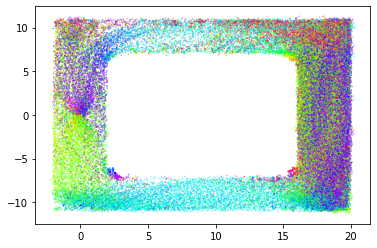

In [21]:
plt.scatter(x,y,s=0.05,c=theta,cmap='hsv')

In [22]:
print(theta.min())
print(theta.max())

-3.141479932433044
3.141353926738127


(array([6.0000e+01, 5.6500e+03, 0.0000e+00, 2.2550e+03, 0.0000e+00,
        0.0000e+00, 1.2200e+03, 9.2790e+03, 7.5411e+04, 5.7630e+03]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

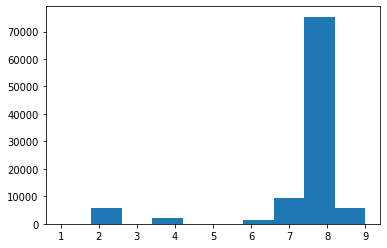

In [23]:
plt.hist(S, bins=10)

In [24]:
tab10 = plt.cm.get_cmap('tab10')

In [25]:
tab10.colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

In [26]:
classified_data_r = np.loadtxt('classified_samples_xx.txt')
events = np.loadtxt('eval_events_2.txt')

In [27]:
classified_data_3 = np.loadtxt('classified_samples_xxxx.txt')
events_3 = np.loadtxt('eval_events_3.txt')
epsd_lenghts_3 = np.loadtxt('eval_lenghts_3.txt')

(100,)


300.0

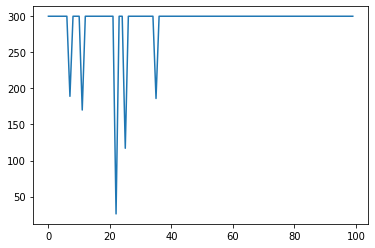

In [28]:
plt.plot(epsd_lenghts_3)
print(epsd_lenghts_3.shape)
epsd_lenghts_3[64]

In [29]:
x_r, y_r, theta_r, S_r = classified_data_r[:,0], classified_data_r[:,1], classified_data_r[:,2], classified_data_r[:,3]
x_3, y_3, theta_3, S_3 = classified_data_3[:,0], classified_data_3[:,1], classified_data_3[:,2], classified_data_3[:,3]

In [30]:
N_r = x_r.shape[0]
N_3 = x_3.shape[0]

In [31]:
deltas_r = theta_r.reshape(-1,1) - angles.reshape(1,-1)
g_id_r = (np.abs(deltas_r) <= np.pi/(8*G)).argmax(1).reshape(-1,1)
g_id_r = np.array([g_id_r[i] if g_id_r[i] != 8*G else 0 for i in range(0, N_r)])

deltas_r_ = deltas_r[:,:8*G]
delta_id_r_ = (8*G*np.argmin([np.abs(deltas_r[:,0]),np.abs(deltas_r[:,8*G])],0)).astype(int)
deltas_r_[:,0] = deltas_r[np.arange(N_r),delta_id_r_]
g_id_r_ = (g_id_r%(8*G)).astype('int')

In [32]:
deltas_3 = theta_3.reshape(-1,1) - angles.reshape(1,-1)
g_id_3 = (np.abs(deltas_3) <= np.pi/(8*G)).argmax(1).reshape(-1,1)
g_id_3 = np.array([g_id_3[i] if g_id_3[i] != 8*G else 0 for i in range(0, N_3)])

deltas_3_ = deltas_3[:,:8*G]
delta_id_3_ = (8*G*np.argmin([np.abs(deltas_3[:,0]),np.abs(deltas_3[:,8*G])],0)).astype(int)
deltas_3_[:,0] = deltas_3[np.arange(N_3),delta_id_3_]
g_id_3_ = (g_id_3%(8*G)).astype('int')

In [33]:
x_g_r, y_g_r, theta_g_r, S_g_r, deltas_g_r = [], [], [], [], []
x_g_3, y_g_3, theta_g_3, S_g_3, deltas_g_3 = [], [], [], [], []

In [34]:
for k in range(0,8*G):
    x_g_r.append( np.array([x_r[i] for i in range(0, N_r//100) if g_id_r[i]==k]) )
    y_g_r.append( np.array([y_r[i] for i in range(0, N_r//100) if g_id_r[i]==k]) )
    theta_g_r.append( np.array([theta_r[i] for i in range(0, N_r//100) if g_id_r[i]==k]) )
    S_g_r.append( np.array([S_r[i] for i in range(0, N_r//100) if g_id_r[i]==k]) )
    deltas_g_r.append( np.array([deltas_r_[i,k] for i in range(0, N_r//100) if g_id_r_[i]==k]) )

In [35]:
for k in range(0,8*G):
    x_g_3.append( np.array([x_3[i] for i in range(0, N_3//100) if g_id_3[i]==k]) )
    y_g_3.append( np.array([y_3[i] for i in range(0, N_3//100) if g_id_3[i]==k]) )
    theta_g_3.append( np.array([theta_3[i] for i in range(0, N_3//100) if g_id_3[i]==k]) )
    S_g_3.append( np.array([S_3[i] for i in range(0, N_3//100) if g_id_3[i]==k]) )
    deltas_g_3.append( np.array([deltas_3_[i,k] for i in range(0, N_3//100) if g_id_3_[i]==k]) )

(array([1.2000e+01, 2.5680e+03, 3.5300e+02, 5.3820e+03, 7.7200e+02,
        2.7500e+02, 7.0000e+00, 1.5130e+03, 1.8644e+04, 4.7400e+02]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

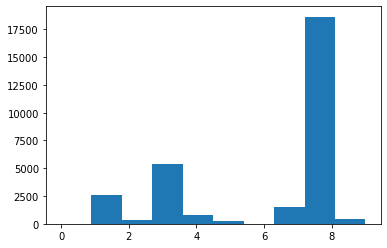

In [36]:
plt.hist(S_r, bins=10)

(array([   27.,  2266.,   436.,   332.,   973.,   242.,   188.,  1048.,
        22924.,   752.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

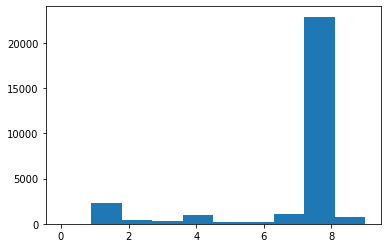

In [37]:
plt.hist(S_3, bins=10)

In [38]:
s_r = events[:,:7]
x_r, y_r, q_r = s_r[:,0].reshape(-1,1), s_r[:,1].reshape(-1,1), s_r[:,3:7]
u_r = 1-2*(q_r[:,2]**2+q_r[:,3]**2)
v_r = 2*(q_r[:,0]*q_r[:,3] + q_r[:,1]*q_r[:,2])
gp = events[:,-32:].reshape(-1,16,2)
x_gp, y_gp = gp[:,:,0], gp[:,:,1]

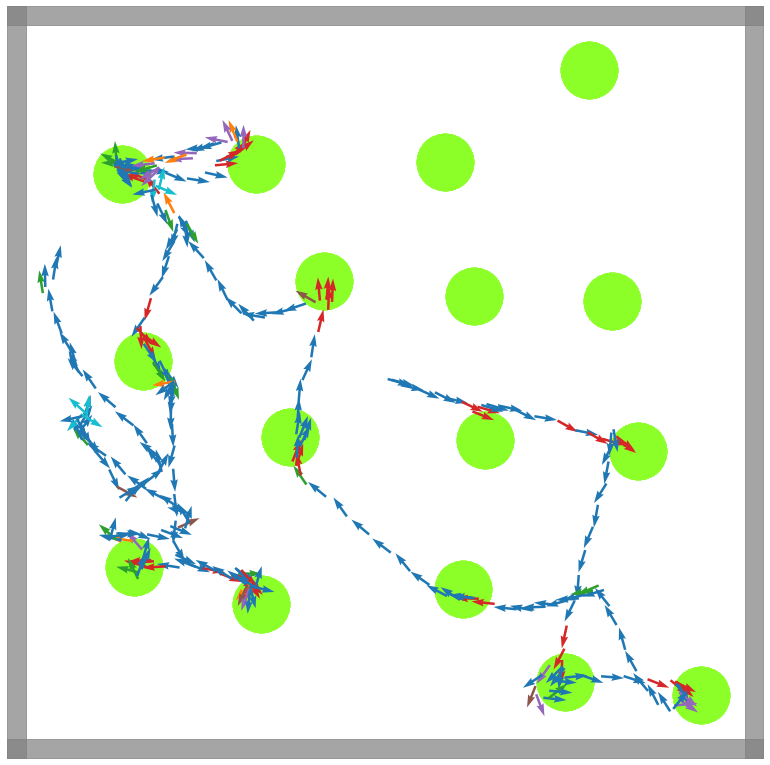

In [40]:
fig_r = plt.figure(figsize=(13,13))

left_outer_r, width_outer_r = -10.5, 21.0
bottom_outer_r, height_outer_r = -10.5, 21.
right_outer_r = left_outer_r + width_outer_r
top_outer_r = bottom_outer_r + height_outer_r

axes_r = []
outer_squares_r = [[] for i in range(0,4)]

event_id = 79
id_s = event_id*(N_r//100)
id_f = (event_id+1)*(N_r//100)

for i in range(0,1):
    axes_r.append(plt.subplot())

    outer_squares_r[0].append(patches.Rectangle((left_outer_r+0.5, bottom_outer_r+0.5), 1-delta, height_outer_r-1, **kwargs_patches))
    outer_squares_r[1].append(patches.Rectangle((left_outer_r+width_outer_r-1+delta-0.5, bottom_outer_r+0.5), 1-delta, height_outer_r-1, **kwargs_patches))
    outer_squares_r[2].append(patches.Rectangle((left_outer_r+0.5, bottom_outer_r+0.5), height_outer_r-1, 1-delta, **kwargs_patches))
    outer_squares_r[3].append(patches.Rectangle((left_outer_r+0.5, bottom_outer_r+width_outer_r-1+delta-0.5), height_outer_r-1, 1-delta, **kwargs_patches))
    
    axes_r[-1].scatter(x_gp[id_s:id_f,:].reshape(-1), y_gp[id_s:id_f,:].reshape(-1), s=3251.25, c="#77ff00", alpha=0.025)
    axes_r[-1].quiver(x_r[id_s:id_f], y_r[id_s:id_f], u_r[id_s:id_f], v_r[id_s:id_f], S_r[id_s:id_f], cmap=cmap_r)    
    for k in range(0,4):
        axes_r[-1].add_patch(outer_squares_r[k][-1])

    axes_r[-1].set_axis_off()

# plt.tight_layout()
plt.savefig('square_track_classification_t2.png', dpi=600)
plt.show()

In [41]:
s_3 = events_3[:,:7]
x_3, y_3, q_3 = s_3[:,0].reshape(-1,1), s_3[:,1].reshape(-1,1), s_3[:,3:7]
u_3 = 1-2*(q_3[:,2]**2+q_3[:,3]**2)
v_3 = 2*(q_3[:,0]*q_3[:,3] + q_3[:,1]*q_3[:,2])
gp_3 = events_3[:,-32:].reshape(-1,16,2)
x_gp_3, y_gp_3 = gp_3[:,:,0], gp_3[:,:,1]

In [42]:
print(gp_3.shape)
print(gp.shape)

(29188, 16, 2)
(30000, 16, 2)


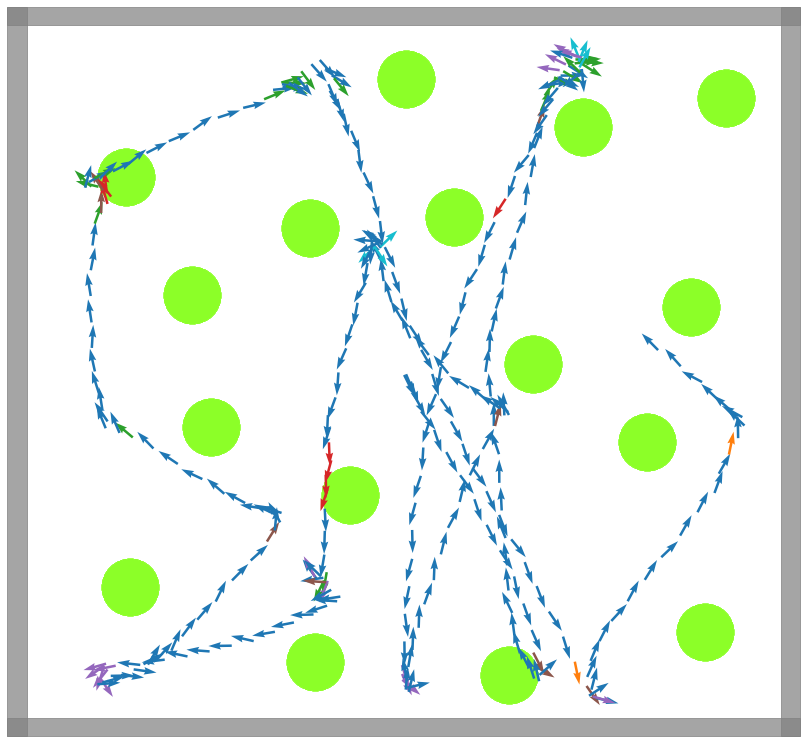

In [45]:
fig_3 = plt.figure(figsize=(13,13))

axes_3 = []
outer_squares_3 = [[] for i in range(0,4)]

event_id_3 = 87
id_s_3 = int(epsd_lenghts_3[:event_id_3].sum())
id_f_3 = int(id_s_3 + epsd_lenghts_3[event_id_3])

for i in range(0,1):
    axes_3.append(plt.subplot())

    outer_squares_3[0].append(patches.Rectangle((left_outer_r+0.5, bottom_outer_r+0.5), 1-delta, height_outer_r-1, **kwargs_patches))
    outer_squares_3[1].append(patches.Rectangle((left_outer_r+width_outer_r-1+delta-0.5, bottom_outer_r+0.5), 1-delta, height_outer_r-1, **kwargs_patches))
    outer_squares_3[2].append(patches.Rectangle((left_outer_r+0.5, bottom_outer_r+0.5), height_outer_r-1, 1-delta, **kwargs_patches))
    outer_squares_3[3].append(patches.Rectangle((left_outer_r+0.5, bottom_outer_r+width_outer_r-1+delta-0.5), height_outer_r-1, 1-delta, **kwargs_patches))
    
    axes_3[-1].scatter(x_gp_3[id_s_3:id_f_3,:].reshape(-1), y_gp_3[id_s_3:id_f_3,:].reshape(-1), s=3251.25, c="#77ff00", alpha=0.025)
    axes_3[-1].quiver(x_3[id_s_3:id_f_3], y_3[id_s_3:id_f_3], u_3[id_s_3:id_f_3], v_3[id_s_3:id_f_3], S_3[id_s_3:id_f_3], cmap=cmap_r)    
    for k in range(0,4):
        axes_3[-1].add_patch(outer_squares_3[k][-1])

    axes_3[-1].set_axis_off()

# plt.tight_layout()
plt.savefig('square_track_classification_t3.png', dpi=600)
plt.show()

In [46]:
classified_data_0 = np.loadtxt('classified_samples_xxx.txt')
events_0 = np.loadtxt('eval_events_0.txt')

In [47]:
x_0, y_0, theta_0, S_0, _ = classified_data_0[:,0], classified_data_0[:,1], classified_data_0[:,2], classified_data_0[:,3], classified_data_0[:,4]

(array([  908.,   563.,     0.,   550.,     0.,     0.,     0.,  1002.,
        25480.,   738.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

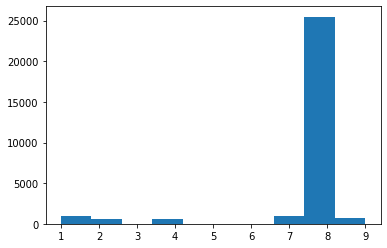

In [48]:
plt.hist(S_0, bins=10)

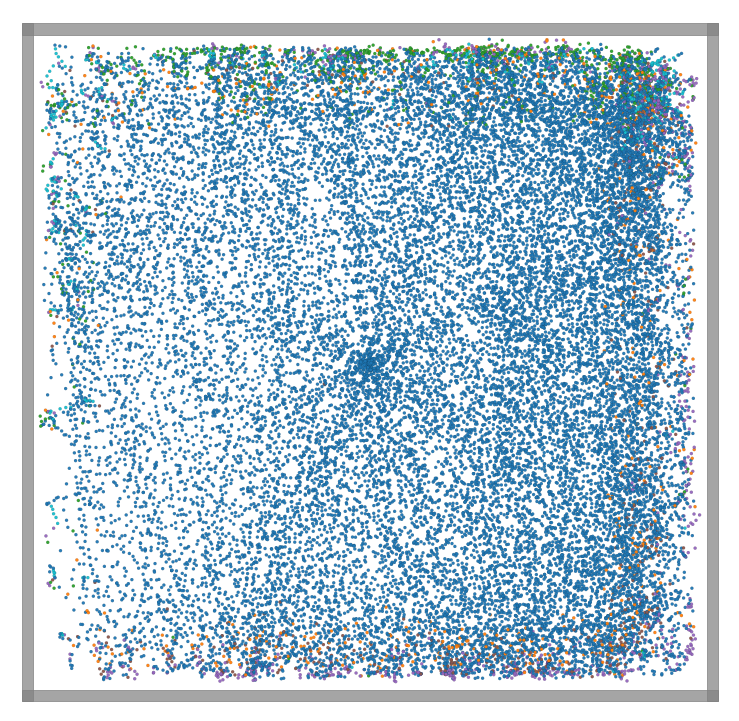

In [49]:
fig_0 = plt.figure(figsize=(13,13))

axes_0 = []
outer_squares_0 = [[] for i in range(0,4)]

left_outer_0, width_outer_0 = -15.5, 31.0
bottom_outer_0, height_outer_0 = -15.5, 31.
right_outer_0 = left_outer_0 + width_outer_0
top_outer_0 = bottom_outer_0 + height_outer_0

for i in range(0,1):
    axes_0.append(plt.subplot())

    outer_squares_0[0].append(patches.Rectangle((left_outer_0+0.5, bottom_outer_0+0.5), 1-delta, height_outer_0-1, **kwargs_patches))
    outer_squares_0[1].append(patches.Rectangle((left_outer_0+width_outer_0-1+delta-0.5, bottom_outer_0+0.5), 1-delta, height_outer_0-1, **kwargs_patches))
    outer_squares_0[2].append(patches.Rectangle((left_outer_0+0.5, bottom_outer_0+0.5), height_outer_0-1, 1-delta, **kwargs_patches))
    outer_squares_0[3].append(patches.Rectangle((left_outer_0+0.5, bottom_outer_0+width_outer_0-1+delta-0.5), height_outer_0-1, 1-delta, **kwargs_patches))
    
    axes_0[-1].scatter(x_0, y_0, c=S_0, cmap=cmap_r, s=10, marker='o', edgecolors='k', linewidths=0.08, alpha=0.95)
    for k in range(0,4):
        axes_0[-1].add_patch(outer_squares_0[k][-1])

    axes_0[-1].set_axis_off()

# plt.tight_layout()
plt.savefig('square_track_classification_t0.png', dpi=600)
plt.show()

In [ ]:
stringg = '12:30'

In [ ]:
h, m = stringg.split(":")

In [ ]:
t = int(h)*60+int(m)

In [ ]:
t

In [1239]:
lengths_tl = np.loadtxt('lenghts_tl.txt')

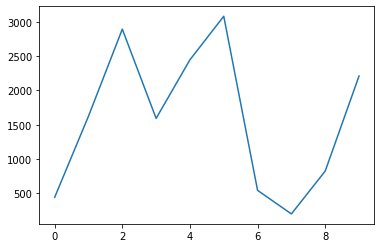

In [1240]:
plt.plot(lengths_tl)